In [1]:
import pymongo


client = pymongo.MongoClient()

# print(client.list_database_names())
db = client['PAM2060']
# print(db.list_collection_names())
col = db['vision_retries']


In [2]:
for s in range(101,111):
    res = col.find({'station':s, 'component': 'holder'})
    res = [r['steps'] for r in res]
    res2 = [len(r) for r in res]
    av = sum(res2) / len(res2)

    print(s, av, res)

101 3.0 [[-7.2, -0.0], [21.6, 3.6, -0.0], [-100.8, -3.6, -0.0], [-36.0, -0.0], [46.800000000000004, 7.2, -0.0], [-93.60000000000001, -3.6, -0.0], [-72.0, -0.0], [115.2, 25.2, 21.6, 14.4, 7.2, -0.0], [115.2, 14.4, -0.0]]
102 3.5714285714285716 [[-133.20000000000002, -7.2, -0.0], [-144.0, -0.0], [136.8, 7.2, -0.0], [36.0, -0.0], [111.60000000000001, -100.8, -108.0, 100.8, 108.0, -100.8, -108.0, 100.8, 108.0, -100.8], [54.0, 3.6, -0.0], [-129.6, -0.0]]
103 3.6666666666666665 [[61.2, 7.2, -0.0], [64.8, -3.6, -3.6, -0.0], [115.2, -0.0], [32.4, 3.6, -0.0], [-136.8, -0.0], [180.0, 7.2, -0.0], [-115.2, -7.2, -0.0], [-136.8, 14.4, -7.2, 7.2, -7.2, 7.2, -7.2, 7.2, -7.2, 7.2], [50.4, 3.6, -0.0]]
104 2.6666666666666665 [[100.8, -0.0], [93.60000000000001, -0.0], [-93.60000000000001, -7.2, -0.0], [-93.60000000000001, -0.0], [172.8, 7.2, -0.0], [46.800000000000004, 3.6, -0.0], [-129.6, -3.6, -0.0], [100.8, -0.0], [79.2, 7.2, -0.0], [72.0, -0.0], [93.60000000000001, 176.4, 3.6, -0.0], [122.4, 7.2, -0.

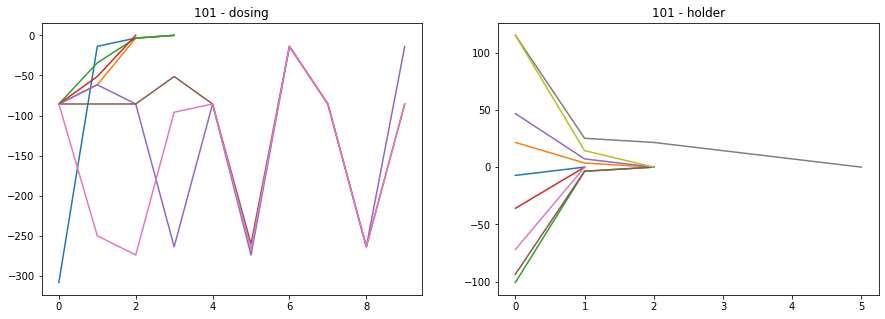

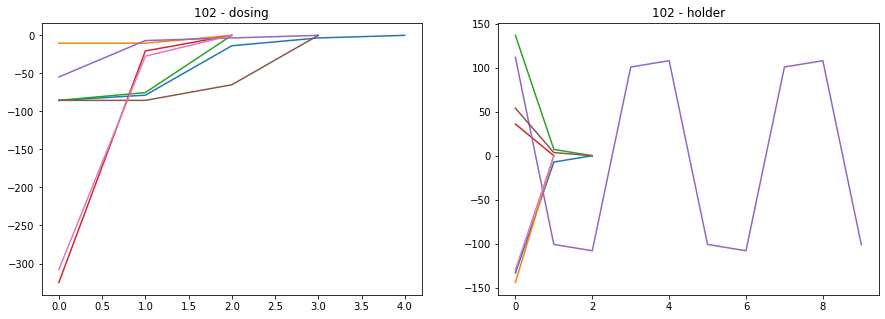

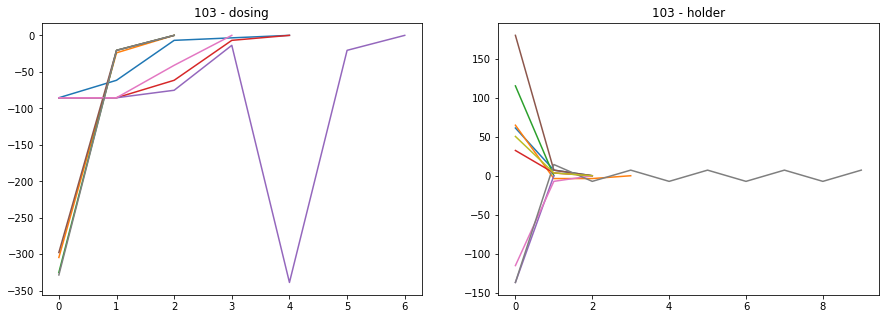

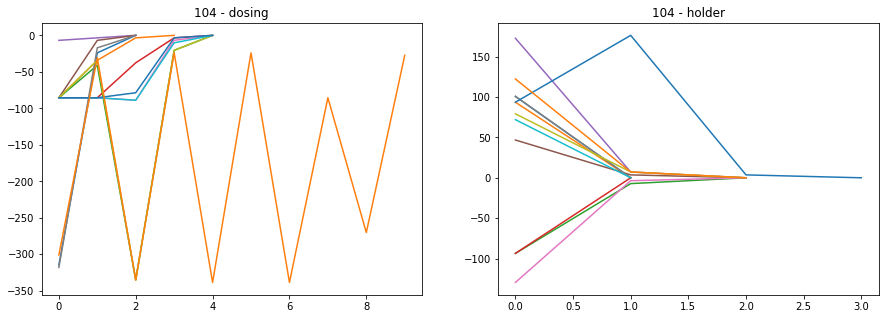

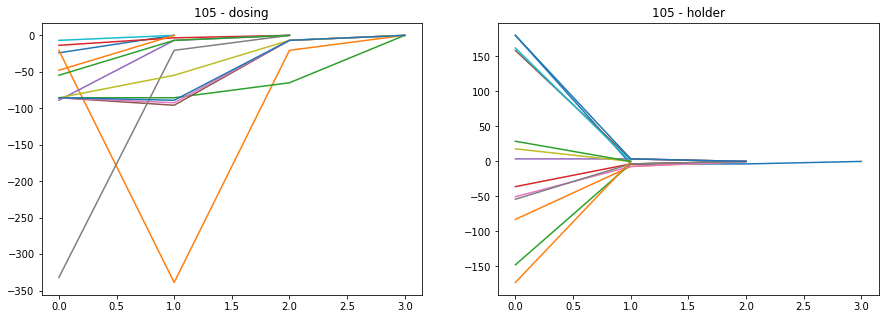

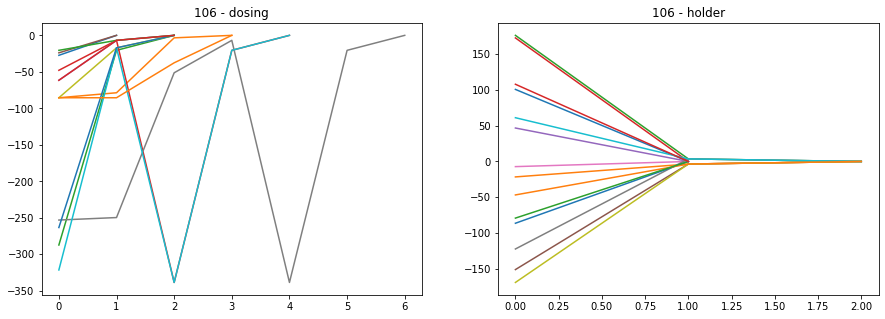

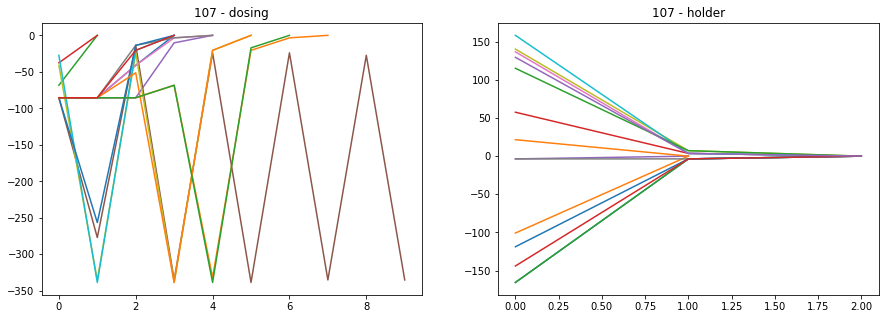

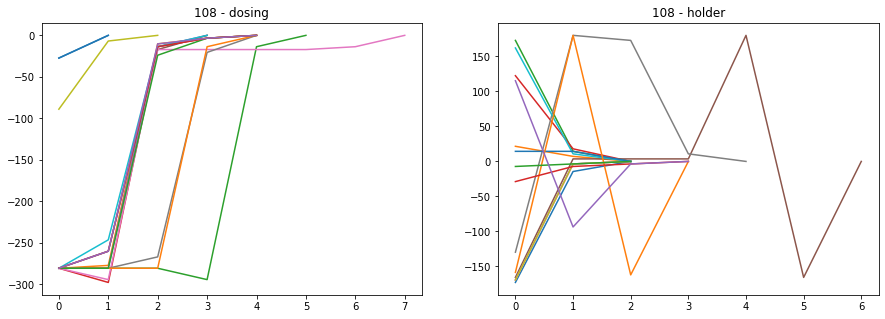

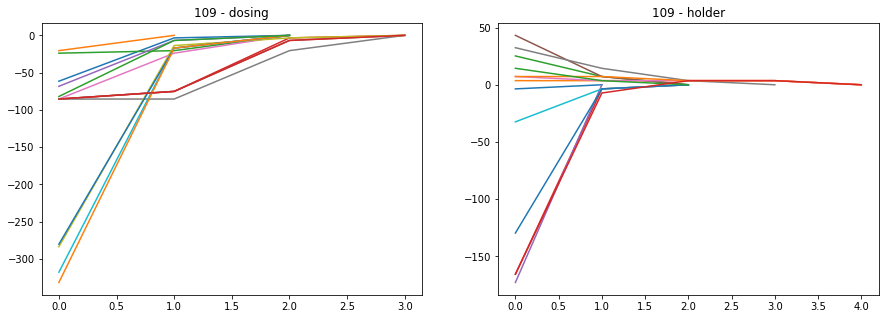

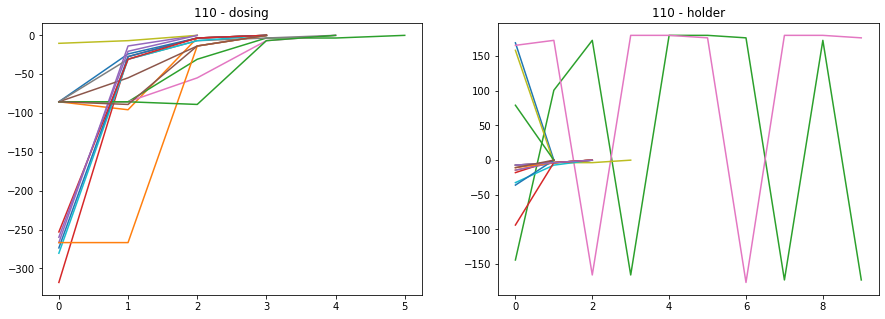

In [11]:
import matplotlib.pyplot as plt


for s in range(101,111):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    axs = {'dosing': ax1, 'holder': ax2}
    fig.set_size_inches(15, 5, forward=True)

    for component in ['holder', 'dosing']:
        res = col.find({'station':s, 'component': component})
        res = [r['steps'] for r in res]
        ax = axs[component]
        for i in res:
            ax.plot(i)

        ax.set_title(str(s) + ' - ' + component)


2.5